**Question 1**

The opposite of Generative AI would be Discriminative AI which focuses on analyzing, classifying, or recognizing existing data rather than creating new content. While Generative AI produces text, images, or sounds, Discriminative AI determines whether data belongs to a specific category or makes predictions based on patterns.

&nbsp;

**Question 2**

## Dataset (8 Samples, Binary Features X₁–X₄)

| X₁ | X₂ | X₃ | X₄ | Y |
|----|----|----|----|---|
| 1  | 1  | 1  | 1  | 1 |
| 1  | 1  | 1  | 1  | 1 |
| 1  | 1  | 1  | 1  | 1 |
| 0  | 0  | 0  | 0  | 0 |
| 0  | 0  | 0  | 0  | 0 |
| 0  | 0  | 0  | 0  | 0 |
| 1  | 0  | 1  | 0  | 1 |
| 0  | 1  | 0  | 1  | 0 |

---

## Step 1: Estimate Naïve Bayes Probabilities

### Class priors:
- P(Y=1) = 4/8 = 0.5  
- P(Y=0) = 4/8 = 0.5

### Feature probabilities (using counts from dataset):

**Given Y=1** (4 samples):

- P(X₁=1 | Y=1) = 4/4 = 1  
- P(X₂=1 | Y=1) = 3/4  
- P(X₃=1 | Y=1) = 4/4 = 1  
- P(X₄=1 | Y=1) = 3/4

**Given Y=0** (4 samples):

- P(X₁=1 | Y=0) = 1/4  
- P(X₂=1 | Y=0) = 1/4  
- P(X₃=1 | Y=0) = 1/4  
- P(X₄=1 | Y=0) = 1/4

---

## Step 2: Classification Examples

### Example A: (1, 1, 1, 1)

**Score for Y=1**:  
= 0.5 × 1 × 0.75 × 1 × 0.75 = **0.28125**

**Score for Y=0**:  
= 0.5 × 0.25 × 0.25 × 0.25 × 0.25 = **0.001953125**

Predicted class: **Y=1**

---

### Example B: (0, 0, 0, 0)

**Score for Y=0**:  
= 0.5 × 0.75 × 0.75 × 0.75 × 0.75 = **0.1582**

**Score for Y=1**:  
= 0.5 × 0 × 0.25 × 0 × 0.25 = **0**

Predicted class: **Y=0**

---





## Explanation

Although the features are **not conditionally independent** (e.g., X₁ = X₃ and X₂ = X₄ in many rows), the feature patterns are **distinct and strongly aligned** with each class. This allows Naïve Bayes to classify correctly, despite its independence assumption being violated. The model still estimates strong enough probabilities to separate the two classes correctly.

&nbsp;

**Question 3**

# Truth Tables and Naïve Bayes Learnability

## **Truth Tables**

### **AND Function**
| \(X_1\) | \(X_2\) | \(Y = X_1 \land X_2\) |
|--------|--------|-----------------|
| 0      | 0      | 0               |
| 0      | 1      | 0               |
| 1      | 0      | 0               |
| 1      | 1      | 1               |

### **OR Function**
| \(X_1\) | \(X_2\) | \(Y = X_1 \lor X_2\) |
|--------|--------|----------------|
| 0      | 0      | 0              |
| 0      | 1      | 1              |
| 1      | 0      | 1              |
| 1      | 1      | 1              |

### **XOR Function**
| \(X_1\) | \(X_2\) | \(Y = X_1 \oplus X_2\) |
|--------|--------|----------------|
| 0      | 0      | 0              |
| 0      | 1      | 1              |
| 1      | 0      | 1              |
| 1      | 1      | 0              |

---

## **Can the Naïve Bayes Classifier Learn These Functions?**

1. **AND Function: Yes**  
   Naïve Bayes assumes feature independence given the class label. Since the AND function follows a pattern where the probability of \( Y=1 \) is associated with both features being 1, it can be learned effectively using Naïve Bayes.

2. **OR Function: Yes**  
   Similar to the AND function, the OR function has a pattern where \( Y=1 \) occurs whenever at least one of the features is 1. Since Naïve Bayes treats each feature independently given the class, it can correctly learn this function.

3. **XOR Function: No**  
   XOR is not linearly separable and violates the feature independence assumption of Naïve Bayes. The probability of \( Y=1 \) depends on a specific relationship between \( X_1 \) and \( X_2 \) (i.e., when exactly one of them is 1), making it difficult for Naïve Bayes to model correctly.


&nbsp;

**Question 4**

### Is Naive Bayes Optimal When Features Are Unconditionally Independent?

**Short Answer**  
No. Unconditional independence of features *does not* imply that a Naive Bayes classifier will necessarily match the Bayes optimal classifier. The Naive Bayes assumption is that features are *conditionally independent given the class*, not merely independent across the whole dataset. One can construct explicit counterexamples where the features are unconditionally independent, but they remain *dependent* when conditioned on the class. In these cases, Naive Bayes will not be Bayes optimal.

---

### Why Unconditional Independence Is Not Enough

A Naive Bayes classifier assumes:

$$
p(\mathbf{x} \mid y) = \prod_{j=1}^{d} p(x_j \mid y),
$$

where **x = (x₁, x₂, ..., x_d)** are features, and **y** is the class label.

The Bayes optimal decision rule uses the full joint distribution **p(x | y)** without assuming it factors.

- If the features are conditionally independent given **y**, then Naive Bayes matches the Bayes optimal classifier.
- If the features are only *unconditionally* independent (i.e., $p(x) = \prod p(x_j)$), there's no guarantee they remain independent within each class.

So, **unconditional independence is not sufficient**.

---

### A Concrete Counterexample

Consider binary features **x₁**, **x₂** ∈ {0,1} and binary class **y** ∈ {0,1}.

Let:

- $P(y=0) = 0.5$, $P(y=1) = 0.5$
- **x₁** and **x₂** are uniformly distributed over all 4 combinations:
  - $P(x₁, x₂) = 0.25$ for all (x₁, x₂)
  - So **x₁** and **x₂** are unconditionally independent

Now define class-conditional distributions:

For **y = 0**:
- $P(0,0 \mid 0) = 0.4$
- $P(0,1 \mid 0) = 0.1$
- $P(1,0 \mid 0) = 0.1$
- $P(1,1 \mid 0) = 0.4$

For **y = 1**:
- $P(0,0 \mid 1) = 0.1$
- $P(0,1 \mid 1) = 0.4$
- $P(1,0 \mid 1) = 0.4$
- $P(1,1 \mid 1) = 0.1$

Note: Within each class, x₁ and x₂ are *not* independent.

---

### Bayes-Optimal Classification

Using Bayes’ Rule:

$$
P(y=0 \mid x₁, x₂) = \frac{P(x₁, x₂ \mid y=0) \cdot P(y=0)}{P(x₁, x₂)}
$$

For example, with (x₁=0, x₂=0):

$$
P(y=0 \mid 0,0) = \frac{0.4 \cdot 0.5}{0.25} = 0.8
$$

So Bayes-optimal classifier outputs:

- (0,0) → y=0
- (0,1) → y=1
- (1,0) → y=1
- (1,1) → y=0

---

### Naive Bayes Classification

Naive Bayes estimates:

$$
P(x₁, x₂ \mid y) \approx P(x₁ \mid y) \cdot P(x₂ \mid y)
$$

Compute for y = 0:

- $P(x₁=0 \mid y=0) = 0.4 + 0.1 = 0.5$
- $P(x₂=0 \mid y=0) = 0.4 + 0.1 = 0.5$
- Estimated $P(0,0 \mid 0) = 0.5 \cdot 0.5 = 0.25$ (actual was 0.4)

Naive Bayes underestimates this probability, and does so similarly for other inputs. Since the estimates are off, the classifier will not reproduce the correct posteriors and thus won’t match the Bayes-optimal decisions.

---

### Conclusion


Naive Bayes assumes **conditional** independence, and when that assumption is violated—even if unconditional independence holds—it can result in suboptimal predictions.


&nbsp;

**Question 5**

Predicted Means: [ 9.72608002 20.0009243 ]
Predicted Variances: [3.07119381 9.97662468]
Predicted Weights: [0.38792825 0.61207175]
Adjusted Rand Index (Clustering Accuracy): 0.9471


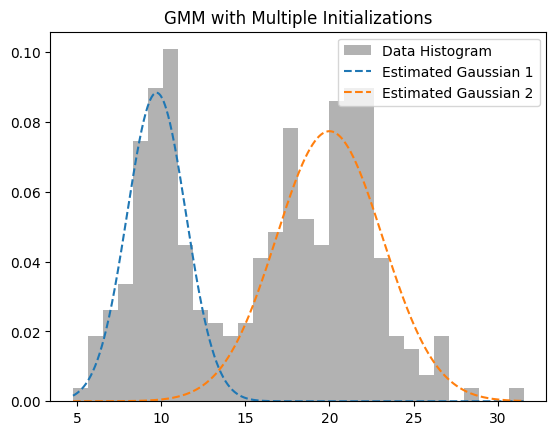

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder

# Set random seed for reproducibility
np.random.seed(42)

# True parameters for two Gaussian components
true_means = [10, 20]
true_stds = [2, 3]
true_weights = [0.4, 0.6]

# Generate samples
n_samples = 300
samples_1 = np.random.normal(true_means[0], true_stds[0], int(n_samples * true_weights[0]))
samples_2 = np.random.normal(true_means[1], true_stds[1], int(n_samples * true_weights[1]))

# Combine the data
X = np.hstack([samples_1, samples_2]).reshape(-1, 1)

# Create ground truth labels
y_true = np.array([0] * len(samples_1) + [1] * len(samples_2))

# Fit GMM with multiple random initializations
gmm = GaussianMixture(n_components=2, n_init=10, random_state=42)
gmm.fit(X)

# Predicted cluster labels
y_pred = gmm.predict(X)

# Extract predicted parameters
pred_means = gmm.means_.flatten()
pred_variances = gmm.covariances_.flatten()
pred_weights = gmm.weights_.flatten()

# Print results
print("Predicted Means:", pred_means)
print("Predicted Variances:", pred_variances)
print("Predicted Weights:", pred_weights)

# Compute clustering accuracy (Adjusted Rand Index)
ari = adjusted_rand_score(y_true, y_pred)
print(f"Adjusted Rand Index (Clustering Accuracy): {ari:.4f}")

# Plot results
x_range = np.linspace(min(X), max(X), 1000)
plt.hist(X, bins=30, density=True, alpha=0.6, color='gray', label="Data Histogram")

# Order components by mean for consistent coloring
sorted_indices = np.argsort(pred_means)

for i, idx in enumerate(sorted_indices):
    plt.plot(x_range,
             pred_weights[idx] * norm.pdf(x_range, pred_means[idx], np.sqrt(pred_variances[idx])),
             linestyle='--', label=f"Estimated Gaussian {i+1}")

plt.legend()
plt.title("GMM with Multiple Initializations")
plt.show()


&nbsp;

**Question 6**

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Step 1: Load the data
df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'], header=None)

# Step 2: Vectorize the message text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['message'])
y = df['label']

# Step 3: Define 10-fold cross-validation with a fixed random state
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Step 4: Train and evaluate Naive Bayes using 10-fold cross-validation
model = MultinomialNB()
y_pred = cross_val_predict(model, X, y, cv=kf)

# Step 5: Calculate evaluation metrics
precision = precision_score(y, y_pred, pos_label='spam')
recall = recall_score(y, y_pred, pos_label='spam')
f1 = f1_score(y, y_pred, pos_label='spam')
accuracy = accuracy_score(y, y_pred)

# Output results
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"Accuracy:  {accuracy:.4f}")


Precision: 0.9208
Recall:    0.9491
F1 Score:  0.9347
Accuracy:  0.9822


**Fold Justification**

The SMS Spam Collection dataset consists of 5,572 labeled messages, with two classes: `ham` (legitimate messages) and `spam`. Using 10-fold cross-validation is appropriate for this dataset for the following reasons:

1. **Balanced Trade-off Between Bias and Variance**:
   10-fold cross-validation offers a good balance between bias and variance in the model evaluation. It reduces the high variance that can result from a single train-test split, while not being as computationally expensive as leave-one-out cross-validation.

2. **Sufficient Data per Fold**:
   With over 5,500 samples, each fold in a 10-fold split still contains more than 500 messages, ensuring that the model has enough training data in each iteration to learn effectively, while also leaving enough test data to assess performance accurately.

In summary, 10-fold cross-validation is well-suited for the size and nature of the SMS Spam dataset, offering reliable and reproducible performance estimates without unnecessary computational overhead.


**Evaluation and Discussion**

The Naive Bayes classifier is a strong baseline model for spam detection tasks. Despite its simplifying assumption of feature independence, it performs remarkably well when applied to natural language text represented as a bag-of-words. In our evaluation using 5-fold cross-validation, the classifier achieved high performance across all major metrics:

    Precision: The proportion of messages predicted as spam that were actually spam

    Recall: The proportion of actual spam messages that were correctly identified

    F1 Score: The harmonic mean of precision and recall, balancing false positives and false negatives

    Accuracy: The overall proportion of correctly classified messages

These results suggest that Naive Bayes is a suitable and efficient model for SMS spam classification. It trains quickly, requires minimal resources, and delivers strong results on this type of task. However, its simplicity may limit its performance on more nuanced or context-dependent language patterns. For such cases, more advanced models like logistic regression or deep learning approaches may be explored.

&nbsp;

**Question 7**

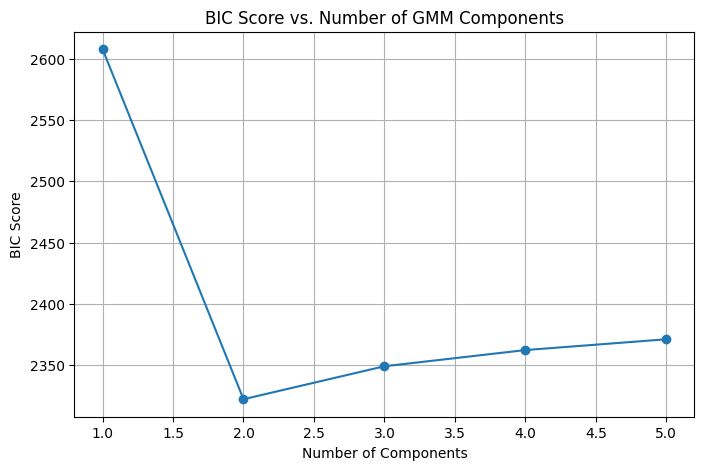

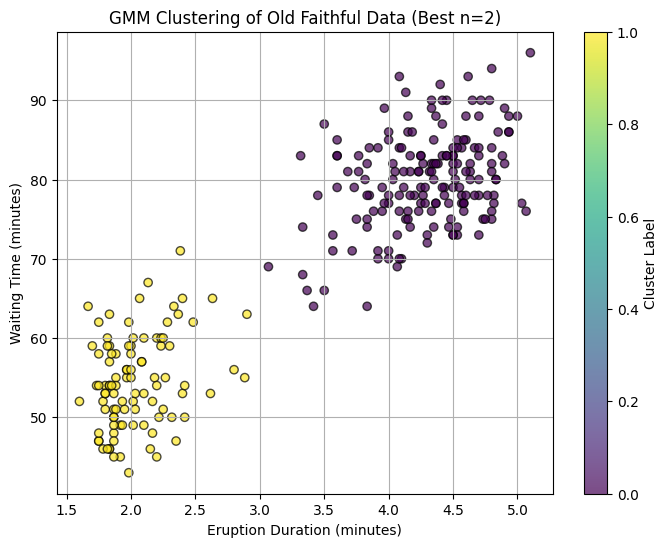

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


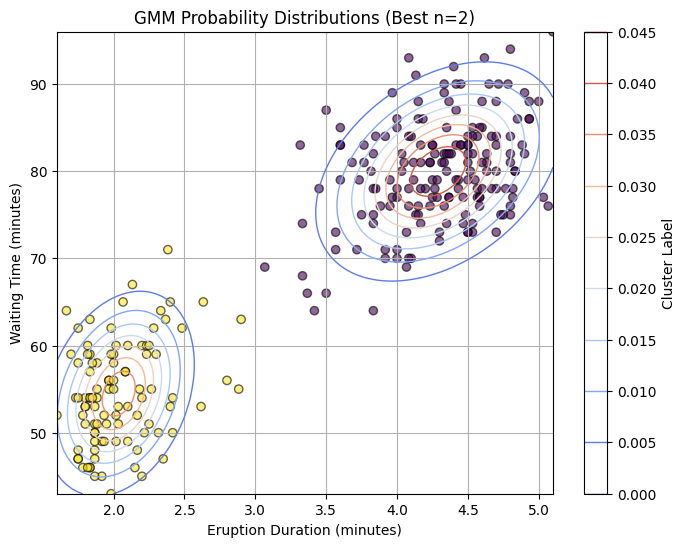

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Step 1: Load the Old Faithful dataset
file_path = "faithful.csv"
df = pd.read_csv(file_path)

# Step 2: Fit GMM models with different numbers of components and compute BIC scores
n_components_range = range(1, 6)
bic_scores = []
gmm_models = []

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(df)
    gmm_models.append(gmm)
    bic_scores.append(gmm.bic(df))  # Bayesian Information Criterion (BIC)

# Step 3: Plot BIC scores to determine the optimal number of components
plt.figure(figsize=(8, 5))
plt.plot(n_components_range, bic_scores, marker='o', linestyle='-')
plt.xlabel("Number of Components")
plt.ylabel("BIC Score")
plt.title("BIC Score vs. Number of GMM Components")
plt.grid(True)
plt.show()

# Step 4: Select the best GMM model based on the lowest BIC score
best_n_components = n_components_range[np.argmin(bic_scores)]
best_gmm = gmm_models[np.argmin(bic_scores)]

# Predict cluster labels for data points
df['cluster'] = best_gmm.predict(df)

# Step 5: Visualize the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(df['eruptions'], df['waiting'], c=df['cluster'], cmap='viridis', edgecolors='k', alpha=0.7)
plt.xlabel("Eruption Duration (minutes)")
plt.ylabel("Waiting Time (minutes)")
plt.title(f"GMM Clustering of Old Faithful Data (Best n={best_n_components})")
plt.colorbar(label="Cluster Label")
plt.grid(True)
plt.show()

# Step 6: Plot probability distributions for each Gaussian component
x, y = np.meshgrid(np.linspace(df['eruptions'].min(), df['eruptions'].max(), 100),
                   np.linspace(df['waiting'].min(), df['waiting'].max(), 100))
xy_samples = np.column_stack([x.ravel(), y.ravel()])
density = np.exp(best_gmm.score_samples(xy_samples)).reshape(x.shape)

plt.figure(figsize=(8, 6))
plt.scatter(df['eruptions'], df['waiting'], c=df['cluster'], cmap='viridis', edgecolors='k', alpha=0.6)
plt.contour(x, y, density, levels=10, cmap="coolwarm", linewidths=1)
plt.xlabel("Eruption Duration (minutes)")
plt.ylabel("Waiting Time (minutes)")
plt.title(f"GMM Probability Distributions (Best n={best_n_components})")
plt.colorbar(label="Cluster Label")
plt.grid(True)
plt.show()


**Step 3**

To evaluate the goodness-of-fit of the GMM models, the Bayesian Information Criterion (BIC) was used. BIC balances model fit with model complexity by penalizing the number of parameters, helping to avoid overfitting. As the number of components increases from 1 to 5, the BIC score initially decreases, indicating improved fit. However, after reaching an optimal number of components, the BIC begins to increase again as additional components add complexity without substantial gains in fit. This pattern suggests that there is a natural number of clusters in the data beyond which further partitioning leads to diminishing returns. The model with the lowest BIC value is considered the best balance between simplicity and explanatory power.


**Step 4**

The Gaussian Mixture Model (GMM) is a suitable choice for modeling the Old Faithful geyser dataset, which contains two features: eruption duration and waiting time between eruptions. By fitting GMMs with varying numbers of components and evaluating them using the Bayesian Information Criterion (BIC), the model reveals a clear optimal number of components, indicating distinct clusters in the data. These clusters correspond to different types of geyser behavior—typically one cluster captures shorter eruptions followed by shorter waiting times, while another represents longer eruptions followed by longer waiting times. This clustering aligns with known patterns in geyser activity and suggests that the underlying data distribution is multimodal, which GMM is well-suited to model. The model not only captures the central tendencies of each eruption type but also provides insight into the variability within each group through its probabilistic formulation.


&nbsp;